In [5]:
#model KNN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

Y = df_cleaned['FRISKED_AND_ARRESTED']
#'TIME_OF_DAY',
X = df_cleaned[[
    'AGE_GROUP_18-30', 
    'AGE_GROUP_31-45',
    'AGE_GROUP_46-60', 
    'AGE_GROUP_60+', 
    'SUSPECT_SEX_FEMALE',
    'SUSPECT_SEX_MALE',
    'SUSPECT_RACE_DESCRIPTION_AMERICAN INDIAN/ALASKAN NATIVE',
    'SUSPECT_RACE_DESCRIPTION_ASIAN / PACIFIC ISLANDER',
    'SUSPECT_RACE_DESCRIPTION_BLACK',
    'SUSPECT_RACE_DESCRIPTION_BLACK HISPANIC',
    'SUSPECT_RACE_DESCRIPTION_MIDDLE EASTERN/SOUTHWEST ASIAN',
    'SUSPECT_RACE_DESCRIPTION_WHITE',
    'SUSPECT_RACE_DESCRIPTION_WHITE HISPANIC',
    'TIME_OF_DAY_Evening',
    'TIME_OF_DAY_Morning', 
    'TIME_OF_DAY_Night',
    'STOP_DURATION_MINUTES',
    'STOP_LOCATION_BORO_NAME_BRONX',
    'STOP_LOCATION_BORO_NAME_BROOKLYN',
    'STOP_LOCATION_BORO_NAME_MANHATTAN',
    'STOP_LOCATION_BORO_NAME_QUEENS',
    'STOP_LOCATION_BORO_NAME_STATEN ISLAND',
    'OFFICER_EXPLAINED_STOP_FLAG',
    'OFFICER_IN_UNIFORM_FLAG',
    'OTHER_PERSON_STOPPED_FLAG',
    'DEMEANOR_SCORE',
    'COMPLIANCE_SCORE',
    'SUSPECTED_CRIME_DESCRIPTION_ASSAULT',
    'SUSPECTED_CRIME_DESCRIPTION_AUTO STRIPPIG',
    'SUSPECTED_CRIME_DESCRIPTION_BURGLARY',
    'SUSPECTED_CRIME_DESCRIPTION_CPSP',
    'SUSPECTED_CRIME_DESCRIPTION_CPW',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL MISCHIEF',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL POSSESSION OF FORGED INSTRUMENT',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL SALE OF CONTROLLED SUBSTANCE',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL SALE OF MARIHUANA',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL TRESPASS',
    'SUSPECTED_CRIME_DESCRIPTION_FORCIBLE TOUCHING',
    'SUSPECTED_CRIME_DESCRIPTION_GRAND LARCENY',
    'SUSPECTED_CRIME_DESCRIPTION_GRAND LARCENY AUTO',
    'SUSPECTED_CRIME_DESCRIPTION_MAKING GRAFFITI',
    'SUSPECTED_CRIME_DESCRIPTION_MENACING',
    'SUSPECTED_CRIME_DESCRIPTION_MURDER',
    'SUSPECTED_CRIME_DESCRIPTION_OTHER',
    'SUSPECTED_CRIME_DESCRIPTION_PETIT LARCENY',
    'SUSPECTED_CRIME_DESCRIPTION_RAPE',
    'SUSPECTED_CRIME_DESCRIPTION_RECKLESS ENDANGERMENT',
    'SUSPECTED_CRIME_DESCRIPTION_ROBBERY',
    'SUSPECTED_CRIME_DESCRIPTION_TERRORISM',
    'SUSPECTED_CRIME_DESCRIPTION_THEFT OF SERVICES',
    'SUSPECTED_CRIME_DESCRIPTION_UNAUTHORIZED USE OF A VEHICLE'
]]





In [6]:

X = X.loc[:, ~X.columns.duplicated()]
#print(X.dtypes)

In [7]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Check for NaN values and locations
print(X.isnull().sum())

if X.isnull().any().any():
    print(X[X.isnull().any(axis=1)])

AGE_GROUP_18-30                                                            0
AGE_GROUP_31-45                                                            0
AGE_GROUP_46-60                                                            0
AGE_GROUP_60+                                                              0
SUSPECT_SEX_FEMALE                                                         0
SUSPECT_SEX_MALE                                                           0
SUSPECT_RACE_DESCRIPTION_AMERICAN INDIAN/ALASKAN NATIVE                    0
SUSPECT_RACE_DESCRIPTION_ASIAN / PACIFIC ISLANDER                          0
SUSPECT_RACE_DESCRIPTION_BLACK                                             0
SUSPECT_RACE_DESCRIPTION_BLACK HISPANIC                                    0
SUSPECT_RACE_DESCRIPTION_MIDDLE EASTERN/SOUTHWEST ASIAN                    0
SUSPECT_RACE_DESCRIPTION_WHITE                                             0
SUSPECT_RACE_DESCRIPTION_WHITE HISPANIC                                    0

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize KNN with a chosen number of neighbors 
knn = KNeighborsClassifier(n_neighbors=24)

# Fit the model 
knn.fit(X_train_scaled, Y_train)
Y_pred = knn.predict(X_test_scaled)

In [15]:

print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.85
Confusion Matrix:
[[2878   12]
 [ 496    8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2890
           1       0.40      0.02      0.03       504

    accuracy                           0.85      3394
   macro avg       0.63      0.51      0.47      3394
weighted avg       0.79      0.85      0.79      3394



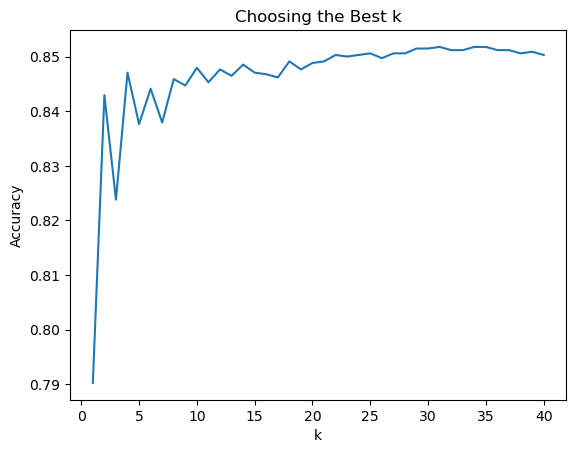

In [17]:
# Loop to find the best k
accuracies = []
for k in range(1, 41): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    Y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(Y_test, Y_pred))

import matplotlib.pyplot as plt
plt.plot(range(1, 41), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Choosing the Best k')
plt.show()

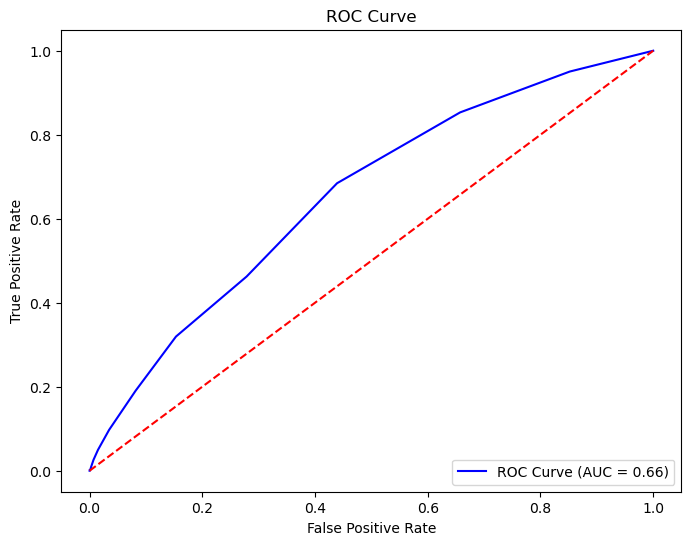

In [30]:
from sklearn.metrics import roc_curve, auc

# Compute probabilities and ROC curve
Y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
